# Iris Flower Classification Model

In [1]:
# Importing essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/admin/Desktop/iris.csv")  
print(df.head())


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [3]:
# Splitting the data into Dependent (x) and Independent (y) variables\
x = df.iloc[:, :-1]
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = df.iloc[:, -1]
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

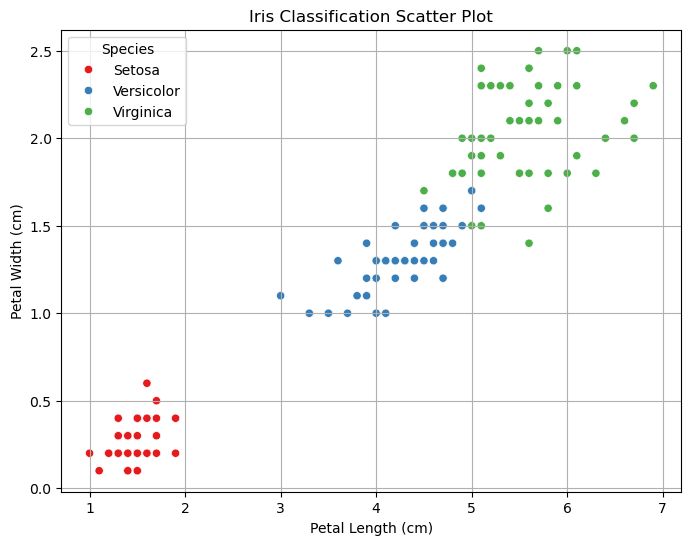

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of petal length vs petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, 
                x='petal.length', 
                y='petal.width', 
                hue=df['variety'], 
                palette='Set1')

plt.title("Iris Classification Scatter Plot")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Species')
plt.grid(True)
plt.show()


In [9]:
#Splitting the dataset into the training and test set

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(len(X_test))

38


In [10]:
# Feature Scaling
# Applying Standardization 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.54399532e-02 -1.19254753e-01  2.25126850e-01  3.55797625e-01]
 [-9.98450310e-02 -1.04039491e+00  1.13559562e-01 -2.98410911e-02]
 [ 1.05300481e+00 -1.19254753e-01  9.50314227e-01  1.12707506e+00]
 [-1.36797986e+00  3.41315328e-01 -1.39259884e+00 -1.31530348e+00]
 [ 1.16828980e+00  1.11030287e-01  7.27179649e-01  1.38416753e+00]
 [-1.02212490e+00  1.03217045e+00 -1.22524790e+00 -8.01118523e-01]
 [-5.60984968e-01  1.49274053e+00 -1.28103155e+00 -1.31530348e+00]
 [-1.02212490e+00 -2.42210516e+00 -1.65358660e-01 -2.86933568e-01]
 [ 7.07149859e-01 -1.19254753e-01  9.50314227e-01  7.41436341e-01]
 [ 9.37719827e-01  5.71600368e-01  1.06188152e+00  1.64126001e+00]
 [ 1.30724937e-01 -1.96153508e+00  6.71396005e-01  3.55797625e-01]
 [ 9.37719827e-01 -1.27067995e+00  1.11766516e+00  7.41436341e-01]
 [-3.30414999e-01 -1.27067995e+00  5.77759173e-02 -1.58387330e-01]
 [ 2.09056967e+00 -1.19254753e-01  1.28501609e+00  1.38416753e+00]
 [ 4.76579890e-01  5.71600368e-01  5.04045072e-01  4.84343863e

In [11]:
# Fitting LogisticRegression 

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [14]:
print(Y_test)

114     Virginica
62     Versicolor
33         Setosa
107     Virginica
7          Setosa
100     Virginica
40         Setosa
86     Versicolor
76     Versicolor
71     Versicolor
134     Virginica
51     Versicolor
73     Versicolor
54     Versicolor
63     Versicolor
37         Setosa
78     Versicolor
90     Versicolor
45         Setosa
16         Setosa
121     Virginica
66     Versicolor
24         Setosa
8          Setosa
126     Virginica
22         Setosa
44         Setosa
97     Versicolor
93     Versicolor
26         Setosa
137     Virginica
84     Versicolor
27         Setosa
127     Virginica
132     Virginica
59     Versicolor
18         Setosa
83     Versicolor
Name: variety, dtype: object


In [15]:
# predicting the Test Set results
Y_pred = classifier.predict(X_test)

#X_pred = classifier.predict(X_train)

print(Y_pred)

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica']


In [16]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.94      0.97        16
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38


Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


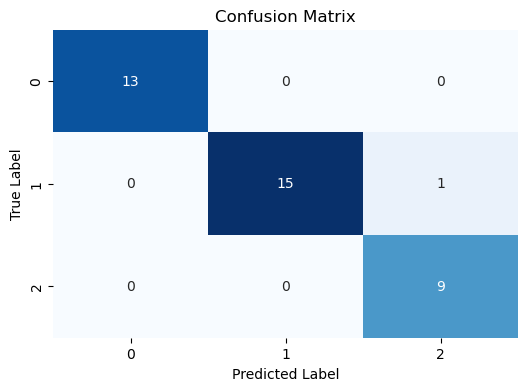

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
